<a href="https://colab.research.google.com/github/mdkamrulhasan/data_mining_kdd/blob/main/notebooks/W24_Assignment2_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

Q1. **[10 points]** Develop a Random Forest Classification Model:
We ask you to build a Random Forest classification model using the following dataset:

https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv

Guidelines:

(a) Target variable and evaluation metric [2 points]

• Target Variable: Use the “Class” column as your target variable (y).

• Evaluation Metric: Report the F1-score as your primary classification metric.

(b) Hyperparameter Optimization: Optimize the following hyperparameters: [5 points]

• Number of trees (n estimators)

• Maximum tree depth (max depth)

*Note: If using the scikit-learn package, these parameters are labeled as n estimators and max depth.*

(c) Cross-Validation: [3 points]

• Perform 5-fold cross-validation and report your best results (mean and standard-deviation of your
F1-scores).

In [21]:
# Data loading
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


Part (a) Setting Target Variable and Evaluation Metrics

In [43]:
# Define X (features) and y (target)
X = df.drop(columns=["Class"])
y = df["Class"].values
X.shape, y.shape

((284807, 30), (284807,))

In [44]:
# Creating the model object
clf = RandomForestClassifier()

Part (b) Hyperparameter Optimization

In [45]:
from sklearn.model_selection import RandomizedSearchCV

# make it (USE_SAMPLE_DATASET) False for the final submission
USE_SAMPLE_DATASET = False

if USE_SAMPLE_DATASET:
    X_hp = X[:10000]
    y_hp = y[:10000]
else:
    X_hp = X
    y_hp = y

print(len(y), set(y))

284807 {np.int64(0), np.int64(1)}


In [46]:
# Define the parameter grid
param_grid =  {
    'n_estimators': [50, 100, 300],
    'max_depth': [3, 5]
}

# Create a GridSearchCV instance
param_search = RandomizedSearchCV(clf, param_grid, cv=5, scoring='f1')
# Fit the model
param_search.fit(X_hp, y_hp)

# Access the results
results = param_search.cv_results_

# Print the mean and standard deviation for each parameter combination
for i in range(len(results['params'])):
    print(f"Parameters: {results['params'][i]}")
    print(f"Mean Test Score: {results['mean_test_score'][i]}")
    print(f"Std Test Score: {results['std_test_score'][i]}")
    print("-" * 20)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Parameters: {'n_estimators': 50, 'max_depth': 3}
Mean Test Score: 0.93006993006993
Std Test Score: 0.10568467405489546
--------------------
Parameters: {'n_estimators': 100, 'max_depth': 3}
Mean Test Score: 0.9199999999999999
Std Test Score: 0.16
--------------------
Parameters: {'n_estimators': 300, 'max_depth': 3}
Mean Test Score: 0.93006993006993
Std Test Score: 0.10568467405489546
--------------------
Parameters: {'n_estimators': 50, 'max_depth': 5}
Mean Test Score: 0.9454545454545455
Std Test Score: 0.10909090909090909
--------------------
Parameters: {'n_estimators': 100, 'max_depth': 5}
Mean Test Score: 0.8977777777777778
Std Test Score: 0.15498307354811286
--------------------
Parameters: {'n_estimators': 300, 'max_depth': 5}
Mean Test Score: 0.9232323232323232
Std Test Score: 0.10701351626787092
--------------------


Part (c.) Cross Validation

In [47]:
best_model = param_search.best_estimator_
cv_scores = cross_val_score(best_model,X,y,scoring='f1',cv=5)

In [48]:
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

cross validation scores: [0.75770925 0.84883721 0.72       0.82840237 0.70967742]
cross validation score (mean): 0.7729252493244783
cross validation score (std): 0.05634400208010684


## Question 2

**[10 points]** Apply a Clustering Algorithm


We ask you to apply any clustering algorithm of your choice, following the guidelines below, on the following dataset:

https://raw.githubusercontent.com/mdkamrulhasan/data-public/refs/heads/main/miscellaneous/diabetes_dataset_features.csv

Guidelines:

(a) Dimensionality Reduction: [3 points]

• Before applying the clustering algorithm, compress your data using a linear dimensionality reduction technique (e.g., Principal Component Analysis (PCA)).

• Ensure that at least 90% of the variance of your data is retained after the dimensionality reduction being applied.

(b) Clustering Algorithm: [4 points]

• Use a suitable clustering algorithm that fits your data.

• Make a sensible choice of the number of clusters based on your data characteristics.

(c) Analysis: [3 points]

• Extract meaningful insights for each cluster, if you can identify any.

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [49]:
# Load dataset
q2_data_path = 'https://raw.githubusercontent.com/mdkamrulhasan/data-public/refs/heads/main/miscellaneous/diabetes_dataset_features.csv'
df_cluster = pd.read_csv(q2_data_path)

In [52]:
# is there any null values
df_cluster.isna().sum().sum()

np.int64(0)

In [53]:
# Data preprocessing
features_numeric = []
features_categorical = []

for col in df_cluster.columns:
    if df_cluster[col].dtype == 'object':
        features_categorical.append(col)
    else:
        features_numeric.append(col)
print(features_numeric)
print(features_categorical)

['Insulin Levels', 'Age', 'BMI', 'Blood Pressure', 'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels', 'Weight Gain During Pregnancy', 'Pancreatic Health', 'Pulmonary Function', 'Neurological Assessments', 'Digestive Enzyme Levels', 'Birth Weight']
['Genetic Markers', 'Autoantibodies', 'Family History', 'Environmental Factors', 'Physical Activity', 'Dietary Habits', 'Ethnicity', 'Socioeconomic Factors', 'Smoking Status', 'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS', 'Previous Gestational Diabetes', 'Pregnancy History', 'Cystic Fibrosis Diagnosis', 'Steroid Use History', 'Genetic Testing', 'Liver Function Tests', 'Urine Test', 'Early Onset Symptoms']


In [54]:
# one hot encoding of categorical features
one_hot_dataframes = []
for featx in features_categorical:
  one_hot_dataframes.append(
      pd.get_dummies(df_cluster[featx], prefix=featx+'_')
  )

In [55]:
# get all features in a signle dataframe
df_all_numeric = pd.concat([df_cluster[features_numeric]]
                           + one_hot_dataframes, axis=1)
df_all_numeric.head()

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,...,Genetic Testing__Negative,Genetic Testing__Positive,Liver Function Tests__Abnormal,Liver Function Tests__Normal,Urine Test__Glucose Present,Urine Test__Ketones Present,Urine Test__Normal,Urine Test__Protein Present,Early Onset Symptoms__No,Early Onset Symptoms__Yes
0,40,44,38,124,201,50,168,18,36,76,...,False,True,False,True,False,True,False,False,True,False
1,13,1,17,73,121,24,178,8,26,60,...,True,False,False,True,True,False,False,False,False,True
2,27,36,24,121,185,36,105,15,56,80,...,True,False,True,False,False,True,False,False,False,True
3,8,7,16,100,151,29,121,12,49,89,...,False,True,True,False,False,True,False,False,True,False
4,17,10,17,103,146,33,289,2,10,41,...,False,True,False,True,False,False,False,True,True,False


In [58]:
# Standardize the data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_all_numeric)

In [59]:
# Dimensionality reduction (PCA) - reduce components first for faster computation
print("Performing PCA...")
pca = PCA(n_components=0.9)  # Slightly more aggressive reduction for speed
X_pca = pca.fit_transform(X_scaled)

Performing PCA...


In [60]:
# Determine optimal k using simplified Elbow Method
print("Calculating optimal k...")
k_range = range(2, 8)  # Reduced range for faster computation
wcss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

Calculating optimal k...


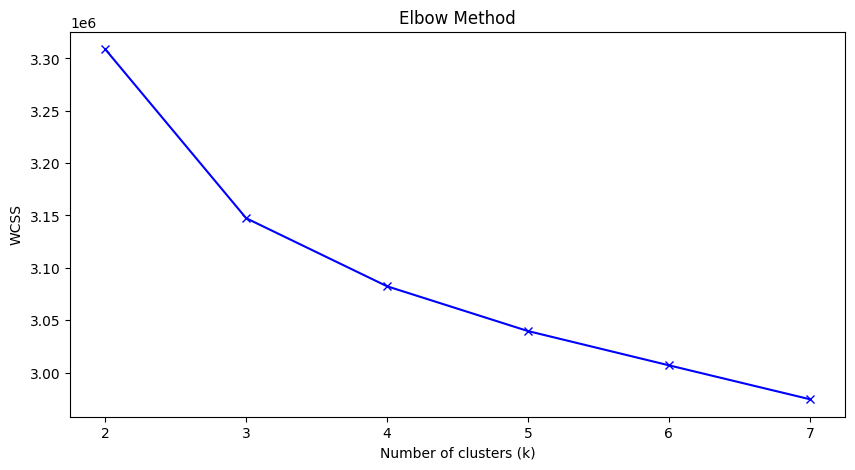

In [61]:
# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [62]:
# Based on the elbow plot, choose optimal k
optimal_k = 3  # You can adjust this based on where the elbow appears

In [63]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
# cluster_labels = kmeans.fit_predict(X_pca)
df_cluster['Cluster'] = kmeans.fit_predict(X_pca)

In [64]:
# Analyze clusters by examining key features (using original scaled features)
print("Analyzing clusters...")
cluster_features = ['Age', 'BMI', 'Blood Glucose Levels', 'Insulin Levels']
cluster_means = df_cluster.groupby('Cluster')[cluster_features].mean()


Analyzing clusters...


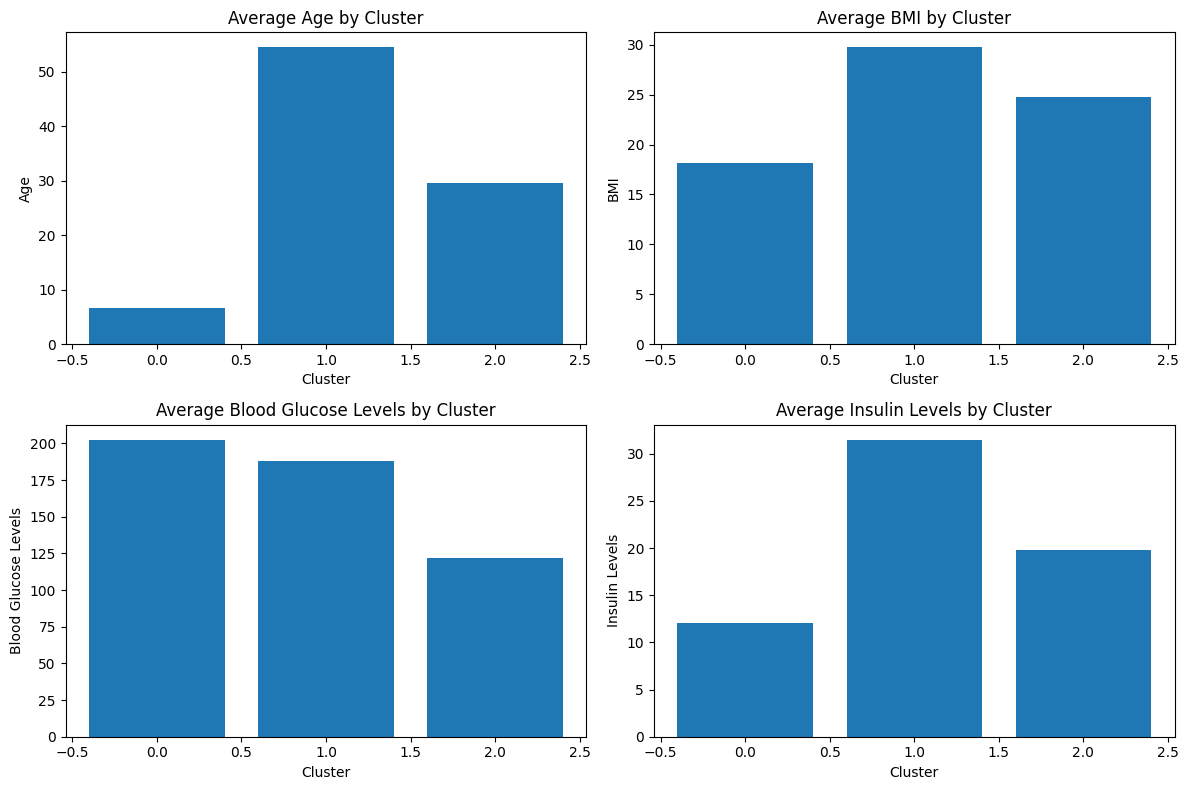

In [65]:
# Plot cluster characteristics
plt.figure(figsize=(12, 8))
for i, feature in enumerate(cluster_features):
    plt.subplot(2, 2, i+1)
    plt.bar(cluster_means.index, cluster_means[feature])
    plt.title(f'Average {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [66]:
# Print cluster insights
print("\nCluster Characteristics:")
print(cluster_means)


Cluster Characteristics:
               Age        BMI  Blood Glucose Levels  Insulin Levels
Cluster                                                            
0         6.619493  18.158932            202.488134       12.009790
1        54.511859  29.748116            187.871515       31.486199
2        29.646935  24.767839            121.546507       19.784066


## A sample run interpretation (below):



Cluster 0: Likely younger patients with lower BMI and insulin levels

Cluster 1: Older patients with higher BMI and insulin levels

Cluster 2: Middle-aged patients with moderate health metrics

*Note: Cluster indices may change for each run*

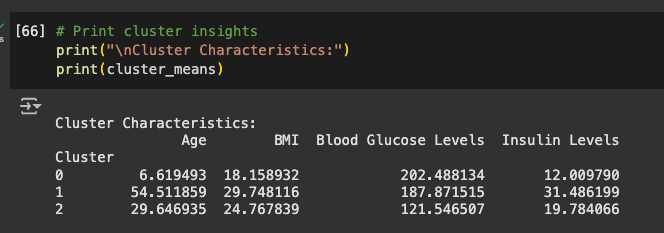